In [84]:
!pip install warnings

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [340]:
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score

import warnings
warnings.filterwarnings('ignore')

In [341]:
datatrain= pd.read_csv("Datos/train.csv")
datatest = pd.read_csv("Datos/test.csv")

In [342]:
datatrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [343]:
valores_faltantes_column = (datatrain.isnull().sum())

print(valores_faltantes_column[valores_faltantes_column > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


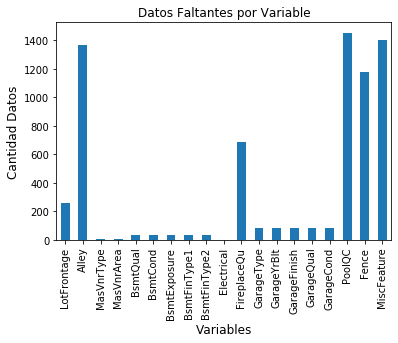

In [344]:
ax = valores_faltantes_column[valores_faltantes_column > 0].plot(kind='bar', title ="Datos Faltantes por Variable")
ax.set_xlabel("Variables", fontsize=12)
ax.set_ylabel("Cantidad Datos", fontsize=12)

plt.show()

# Completando Informacion en Datos de Entrenamiento

In [345]:
# fill up MSZoning with the mode value
datatrain['MSZoning'] = datatrain['MSZoning'].fillna(datatrain['MSZoning'].mode()[0])

# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
datatrain["LotFrontage"] = datatrain.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# from the data description file, NA = No Alley Access
datatrain['Alley'].fillna(0, inplace=True)

# fill up NA values with mode
datatrain['Utilities'] = datatrain['Utilities'].fillna(datatrain['Utilities'].mode()[0])

# since both Exterior1st and 2nd only has 2 missing value, substitute with mode
datatrain['Exterior1st'] = datatrain['Exterior1st'].fillna(datatrain['Exterior1st'].mode()[0])
datatrain['Exterior2nd'] = datatrain['Exterior2nd'].fillna(datatrain['Exterior2nd'].mode()[0])

# fill up MasVnrType with the mode value
datatrain["MasVnrType"] = datatrain["MasVnrType"].fillna(datatrain['MasVnrType'].mode()[0])
datatrain["MasVnrArea"] = datatrain["MasVnrArea"].fillna(datatrain['MasVnrArea'].mode()[0])

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datatrain[col] = datatrain[col].fillna('None')
    
# for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datatrain[col] = datatrain[col].fillna(0)
    
# substitue NA value here with mode
datatrain['Electrical'] = datatrain['Electrical'].fillna(datatrain['Electrical'].mode()[0])

# substitute NA value with mode
datatrain['KitchenQual'] = datatrain['KitchenQual'].fillna(datatrain['KitchenQual'].mode()[0])

# if no value, assume Typ, typical is also mode value
datatrain['Functional'] = datatrain['Functional'].fillna(datatrain['Functional'].mode()[0])

# NA = No Fireplace
datatrain['FireplaceQu'] = datatrain['FireplaceQu'].fillna('None')

# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datatrain[col] = datatrain[col].fillna('None')
    
# as there is no garage, NA value for this column is set to zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datatrain[col] = datatrain[col].fillna(0)
    
# NA = no pool
datatrain['PoolQC'] = datatrain['PoolQC'].fillna('None')

# NA = no fence
datatrain['Fence'] = datatrain['Fence'].fillna('None')

#Misc Feature, NA = None
datatrain['MiscFeature'] = datatrain['MiscFeature'].fillna('None')

#sale type, only have 1 NA value. substitute it with mode value
datatrain['SaleType'] = datatrain['SaleType'].fillna(datatrain['SaleType'].mode()[0])

# checking for any null value left
datatrain.isnull().sum().sum()

0

# Completando Informacion en Datos de Test

In [346]:
# fill up MSZoning with the mode value
datatest['MSZoning'] = datatest['MSZoning'].fillna(datatest['MSZoning'].mode()[0])

# LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.
datatest["LotFrontage"] = datatest.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# from the data description file, NA = No Alley Access
datatest['Alley'].fillna(0, inplace=True)

# fill up NA values with mode
datatest['Utilities'] = datatest['Utilities'].fillna(datatest['Utilities'].mode()[0])

# since both Exterior1st and 2nd only has 2 missing value, substitute with mode
datatest['Exterior1st'] = datatest['Exterior1st'].fillna(datatest['Exterior1st'].mode()[0])
datatest['Exterior2nd'] = datatest['Exterior2nd'].fillna(datatest['Exterior2nd'].mode()[0])

# fill up MasVnrType with the mode value
datatest["MasVnrType"] = datatest["MasVnrType"].fillna(datatest['MasVnrType'].mode()[0])
datatest["MasVnrArea"] = datatest["MasVnrArea"].fillna(datatest['MasVnrArea'].mode()[0])

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    datatest[col] = datatest[col].fillna('None')
    
# for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    datatest[col] = datatest[col].fillna(0)
    
# substitue NA value here with mode
datatest['Electrical'] = datatest['Electrical'].fillna(datatest['Electrical'].mode()[0])

# substitute NA value with mode
datatest['KitchenQual'] = datatest['KitchenQual'].fillna(datatest['KitchenQual'].mode()[0])

# if no value, assume Typ, typical is also mode value
datatest['Functional'] = datatest['Functional'].fillna(datatest['Functional'].mode()[0])

# NA = No Fireplace
datatest['FireplaceQu'] = datatest['FireplaceQu'].fillna('None')

# for these columns, NA = No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    datatest[col] = datatest[col].fillna('None')
    
# as there is no garage, NA value for this column is set to zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    datatest[col] = datatest[col].fillna(0)
    
# NA = no pool
datatest['PoolQC'] = datatest['PoolQC'].fillna('None')

# NA = no fence
datatest['Fence'] = datatest['Fence'].fillna('None')

#Misc Feature, NA = None
datatest['MiscFeature'] = datatest['MiscFeature'].fillna('None')

#sale type, only have 1 NA value. substitute it with mode value
datatest['SaleType'] = datatest['SaleType'].fillna(datatest['SaleType'].mode()[0])

# checking for any null value left
datatest.isnull().sum().sum()

0

In [347]:
datatrain['precio_menor_200k'] = datatrain['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
datatrain['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatrain.loc[datatrain['SalePrice']>200000,'precio_menor_200k'] = 1
datatrain.loc[datatrain['SalePrice']<=200000,'precio_menor_200k'] = 0
datatrain['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatest['precio_menor_200k'] = datatrain['SalePrice'].map(lambda x : 1 if x > 200000 else 0) 
datatest['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

datatest.loc[datatrain['SalePrice']>200000,'precio_menor_200k'] = 1
datatest.loc[datatrain['SalePrice']<=200000,'precio_menor_200k'] = 0
datatest['precio_menor_200k'] = datatrain['precio_menor_200k'].astype('category')

In [348]:
datatrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,precio_menor_200k
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,0
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,1


In [349]:
datatest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,precio_menor_200k
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,6,2010,WD,Normal,1
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,None,None,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,3,2010,WD,Normal,1
3,1464,60,RL,78.0,9978,Pave,0,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,0,IR1,HLS,AllPub,...,0,None,None,None,0,1,2010,WD,Normal,1


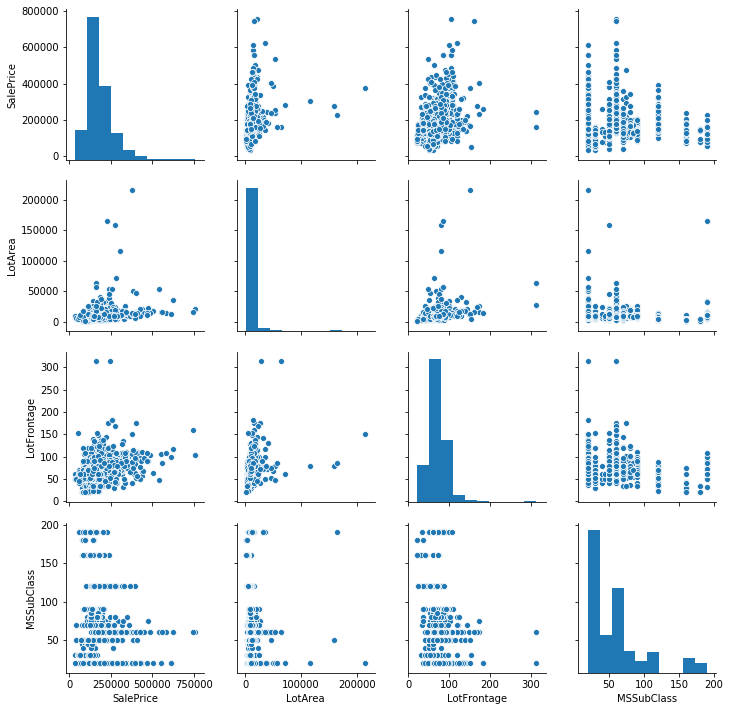

In [321]:
sb.pairplot(datatrain,vars=["SalePrice","LotArea","LotFrontage","MSSubClass"])

In [350]:
variables_utilizadas =['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']

X = datatrain[variables_utilizadas] # Features
y = datatrain.precio_menor_200k # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9315068493150684


In [351]:
X =         ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
            'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
            'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','BsmtHalfBath','GarageYrBlt',
            'GarageCars','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal','MoSold','GarageArea']

X = datatrain[X] # Features
y = datatrain.precio_menor_200k # Target variable

feat_names = X.columns
targ_names = ['1','0']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=3,test_size=.1)
clf = DecisionTreeClassifier(max_depth=None).fit(X_train,Y_train)


In [352]:
print("Training: "+str(clf.score(X_train,Y_train)))
print("Test: "+str(clf.score(X_test,Y_test)))

Training: 1.0
Test: 0.9315068493150684


[[920   0]
 [  0 394]]


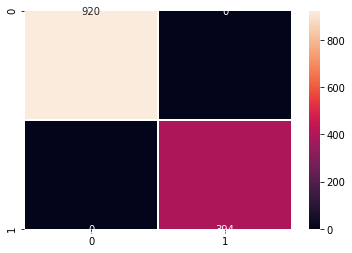

In [353]:
pred = clf.predict(X_train)
confusion_matrix = confusion_matrix(y_true=Y_train,y_pred=pred)

sb.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=.5)

print(confusion_matrix)